In [34]:
import pandas as pd
import numpy as np
import sqlite3
import random

In [50]:
conn = sqlite3.connect("pokemon.db")
cursor=conn.cursor()

In [36]:
pokeType=['electric','fire','water','normal','darkness']
pokeArea=['grass','snow','mountain','air','sea','road']

##
- table for cities
- table for pokemon in cities
- table for each player

# creating the table cities

In [37]:
cursor.execute("create table if not exists cities (id integer primary key autoincrement,name varchar(255))")
cursor.execute("insert into cities (name) values ('namania'),('jardiello'),('fratomi'),('rockallia'),('irlava')")
conn.commit()

# Creating the table pokemon_catched

In [38]:
cursor.execute("create table if not exists pokemon_catched (" \
"id integer primary key autoincrement, name varchar(255), poketype varchar(255),power integer, agility integer, date_catch datetime,catch_area varchar(255), city integer," \
"constraint fk_city foreign key (city) references cities (id) )")

In [42]:
cursor.execute("insert into pokemon_catched (name,poketype,power,agility,date_catch,catch_area,city) values ('poke_0232','water',152,5,'2017-10-22','grass',2)")

In [43]:
conn.commit()

In [45]:
for itval in range(0,200):
    currType=pokeType[random.randint(0,len(pokeType)-1)]
    currArea=pokeArea[random.randint(0,len(pokeArea)-1)]
    currPokemon = ('poke_'+str(itval),currType,random.randint(40,499),random.randint(1,10),str(random.randint(2017,2019))+'-'+str(random.randint(4,10))+'-'+str(random.randint(1,31)),currArea,random.randint(1,6))
    cursor.execute("insert into pokemon_catched (name,poketype,power,agility,date_catch,catch_area,city) values (?,?,?,?,?,?,?)",currPokemon)

In [46]:
conn.commit()
conn.close()

# some basic analysis

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_sql("select * from pokemon_catched",conn)

In [52]:
df

,id,name,poketype,power,agility,date_catch,catch_area,city
0,1,poke_0232,water,152,5,2017-10-22,grass,2
1,2,poke_0,normal,357,7,2017-5-2,snow,5
2,3,poke_1,darkness,179,1,2018-4-19,sea,1
3,4,poke_2,normal,270,3,2017-10-8,air,4
4,5,poke_3,electric,96,5,2017-8-10,road,5
...,...,...,...,...,...,...,...,...
196,197,poke_195,electric,335,1,2017-5-2,road,5
197,198,poke_196,darkness,469,9,2019-5-8,snow,4
198,199,poke_197,darkness,86,3,2018-4-30,snow,5
199,200,poke_198,darkness,256,1,2017-6-10,grass,2


<Axes: xlabel='catch_area', ylabel='Count'>

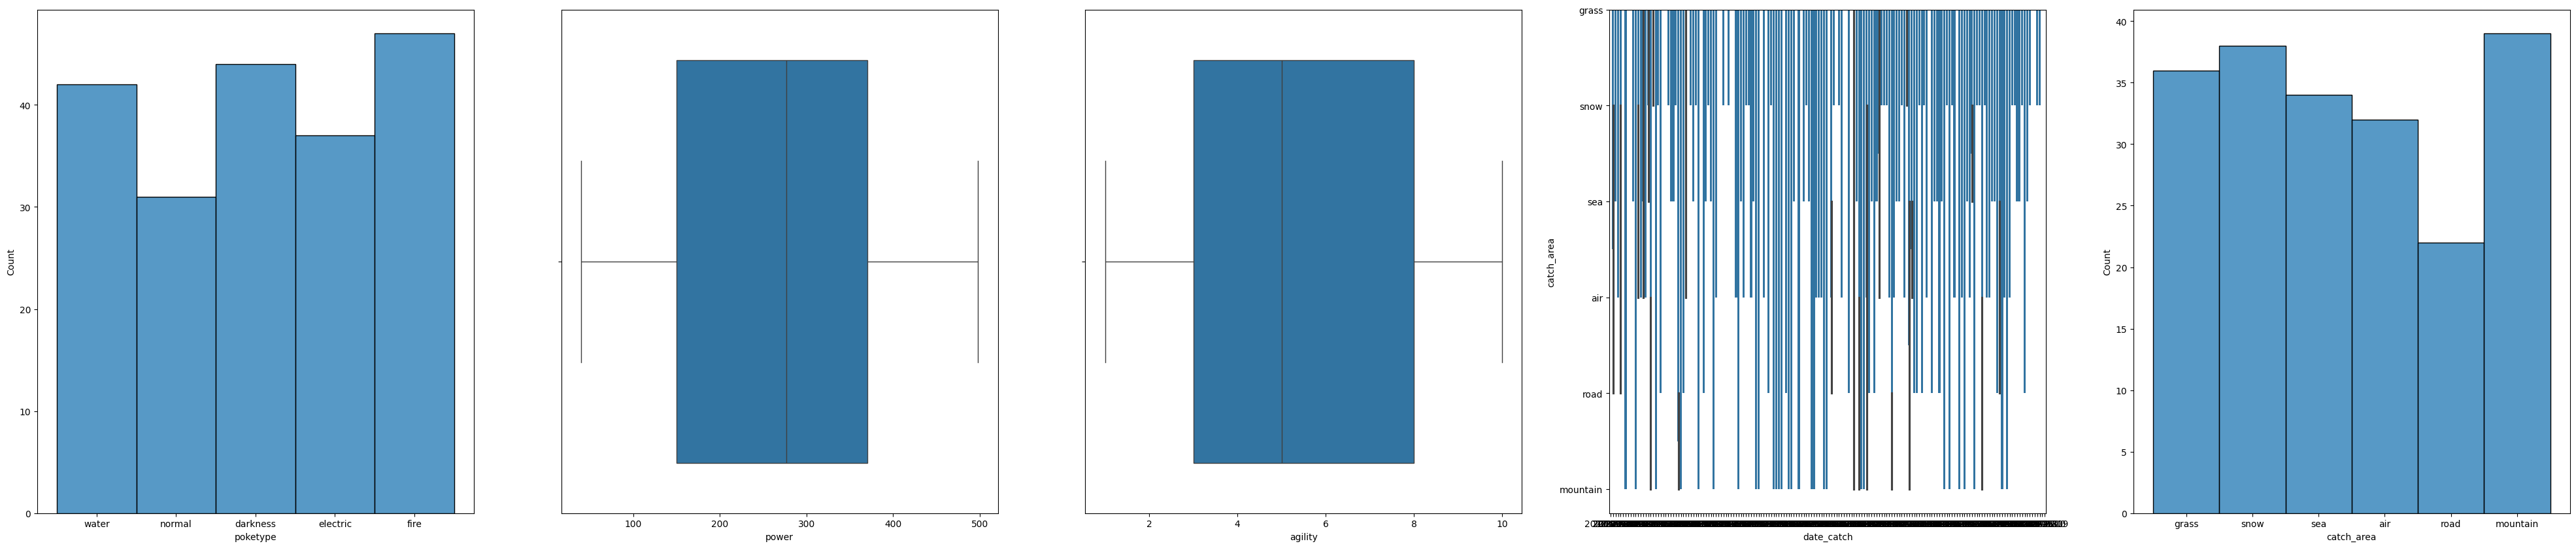

In [74]:
fig, axes = plt.subplots(ncols=5,figsize=(50,10))

sns.histplot(data = df, x='poketype',ax=axes[0])
sns.boxplot(data=df,x="power",ax=axes[1])
sns.boxplot(data=df,x="agility",ax=axes[2])
sns.barplot(data=df,x='date_catch',y='catch_area',ax=axes[3])
sns.histplot(data=df,x='catch_area')